In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
file_path = "data/climate_videos_new.jsonl"
climate_videos_df = pd.read_json(file_path, lines=True)

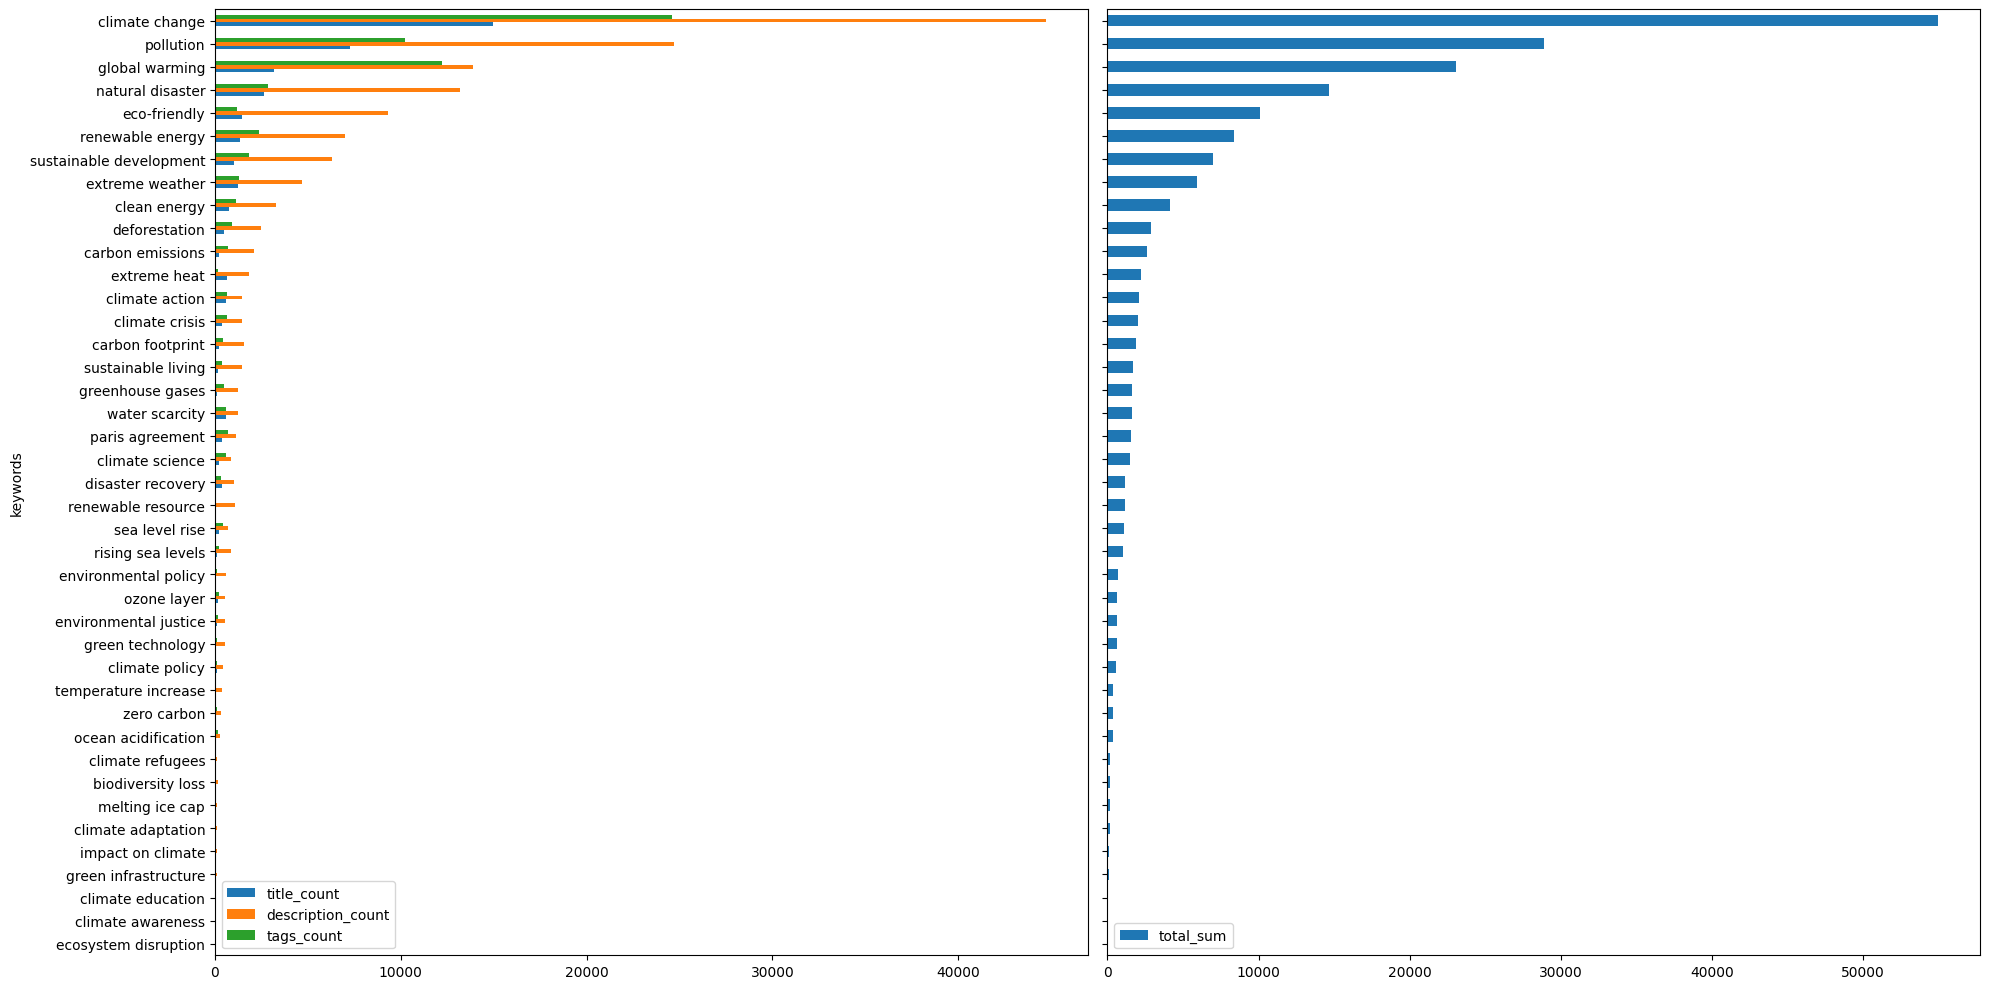

In [90]:
keywords = [
    'climate change', 'global warming', 'greenhouse gases', 'rising sea levels',
    'extreme weather', 'temperature increase', 'climate action', 
    'carbon emissions', 'renewable energy', 'sustainable living',
    'climate science', 'climate crisis', 'climate adaptation',
    'natural disaster', 'extreme heat', 'melting ice cap', 'sea level rise',
    'biodiversity loss', 'deforestation', 'ocean acidification', 'climate policy', 
    'environmental policy',
    'disaster recovery', 'climate refugees',
    'carbon footprint', 'sustainable development', 'green technology',
    'renewable resource', 'eco-friendly',
    'ecosystem disruption', 'impact on climate',
    'paris agreement', 'climate awareness',
    'environmental justice', 'clean energy', 'zero carbon',
    'green infrastructure', 'ozone layer',
    'pollution', 'water scarcity', 'climate education'
]

#keywords = keywords[::5]

keywords_count = pd.DataFrame(columns=['keywords', 'title_count', 'description_count', 'tags_count', 'total_sum'])
keywords_count['keywords'] = keywords
keywords_count.set_index('keywords', inplace=True)

colum_names = ['title', 'description', 'tags']

aug_climate_videos_df = climate_videos_df.copy()

for w in keywords:

    #counts the number of videos that contain the keyword in their metadata
    aug_climate_videos_df['is_' + w] = [1 if w in (climate_videos_df.loc[v, 'title'] + climate_videos_df.loc[v, 'description'] + climate_videos_df.loc[v, 'tags']).lower() else 0 for v in climate_videos_df.index]

    keywords_count.loc[w] = [climate_videos_df[c].str.contains(w, case=False).sum() for c in colum_names] + [aug_climate_videos_df['is_' + w].sum()]

#keywords_count['total_sum'] = keywords_count.sum(axis=1)
keywords_count.sort_values(by=['total_sum'], ascending=True, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

keywords_count[['title_count', 'description_count', 'tags_count']].plot(kind='barh', ax=ax1)
keywords_count[['total_sum']].plot(kind='barh', ax=ax2)

fig.tight_layout()
plt.show()

#PS: ça prend 1 min a run si on fait pas le count des videos qui contiennent le mot dans leur metadata
#    mais que les counts pour title puis description puis tags